<a href="https://colab.research.google.com/github/pjs990301/23-24-AI-Vision-Study/blob/main/LeNet5_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary

In [65]:
lr = 1e-3
batch_size = 64
epochs = 20

In [66]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Datasets

In [67]:
# Dataset은 MNIST Dataset으로 32x32x1 이미지입니다.

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./datasets',
                                      transform=transform, train=True, download=True)
testset = torchvision.datasets.MNIST(root='./datasets',
                                     transform=transform, train=False, download=True)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [68]:
trainset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [69]:
image, label = trainset[10]

classes = trainset.classes

print(image.shape)
print(image.dtype)
print(classes[label])

torch.Size([1, 32, 32])
torch.float32
3 - three


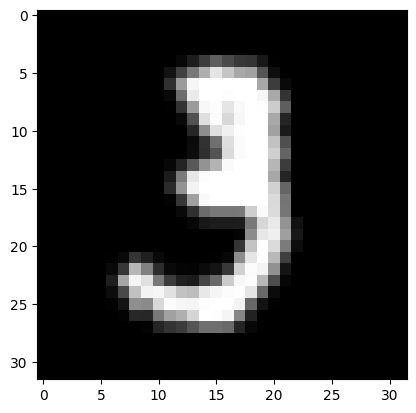

In [70]:
plt.imshow(image.reshape(32,32), cmap = "gray")
plt.show()

# Model (LeNet-5)

In [71]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.C1 = nn.Conv2d(1, 6, kernel_size=5)
        self.S2 = nn.AvgPool2d(2)
        self.C3 = nn.Conv2d(6, 16, kernel_size=5)
        self.S4 = nn.AvgPool2d(2)
        self.C5 = nn.Conv2d(16, 120, kernel_size=5)
        self.F6 = nn.Linear(120, 84)
        self.Out = nn.Linear(84, 10)

    def forward(self, x):
        x = self.C1(x)
        x = F.sigmoid(self.S2(x))
        x = self.C3(x)
        x = self.S4(x)
        x = self.C5(x)
        x = self.F6(torch.squeeze(x))
        x = self.Out(x)

        return x

model = LeNet().to(device)
model

LeNet(
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (S2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (S4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (F6): Linear(in_features=120, out_features=84, bias=True)
  (Out): Linear(in_features=84, out_features=10, bias=True)
)

In [72]:
summary(model, (1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Conv2d-5            [-1, 120, 1, 1]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


# Train

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [74]:
for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # gradient 값을 0으로 변경
        loss.backward() # backpropagation, loss function의 gradient값을 .grad에 저장
        optimizer.step() # 계산된 gradient로 매개변수 업데이트

    print(f"Epoch [{epoch}/{epochs}] Loss: {loss.item():.4f}")

Epoch [0/20] Loss: 0.2064
Epoch [1/20] Loss: 0.1705
Epoch [2/20] Loss: 0.1206
Epoch [3/20] Loss: 0.0797
Epoch [4/20] Loss: 0.0383
Epoch [5/20] Loss: 0.2044
Epoch [6/20] Loss: 0.0237
Epoch [7/20] Loss: 0.2653
Epoch [8/20] Loss: 0.0561
Epoch [9/20] Loss: 0.0397
Epoch [10/20] Loss: 0.0094
Epoch [11/20] Loss: 0.2907
Epoch [12/20] Loss: 0.0231
Epoch [13/20] Loss: 0.0128
Epoch [14/20] Loss: 0.0492
Epoch [15/20] Loss: 0.0468
Epoch [16/20] Loss: 0.0865
Epoch [17/20] Loss: 0.2388
Epoch [18/20] Loss: 0.1956
Epoch [19/20] Loss: 0.1416


In [76]:
model.to('cpu')
for i in range(10):
    pred = torch.argmax(model(trainset[i][0])).item()
    label = trainset.targets[i]

    print(f"모델 예측값 : {pred}, 실제 값 : {label}")

모델 예측값 : 5, 실제 값 : 5
모델 예측값 : 0, 실제 값 : 0
모델 예측값 : 4, 실제 값 : 4
모델 예측값 : 1, 실제 값 : 1
모델 예측값 : 9, 실제 값 : 9
모델 예측값 : 2, 실제 값 : 2
모델 예측값 : 1, 실제 값 : 1
모델 예측값 : 3, 실제 값 : 3
모델 예측값 : 1, 실제 값 : 1
모델 예측값 : 4, 실제 값 : 4
